### Produce a covariance plot for 20km radius pairs of gauges: FR, UC, HM, K, BV
### Transform P values  to uniform on range [0,1] by ranking and dividing by the number of values
### Transform separation distances using scipy distance_matrix (or spatial.distance.cdist) to get them into a form that will work with the RM code

In [2]:
import numpy as np
import pandas as pd
import math
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance_matrix
from scipy.optimize import curve_fit
from numpy import genfromtxt

### Read in P data for all 8 stations from csv file created in P_inputs_2005-2016.ipynb

In [3]:
# Use pd.read_csv to read csv file
P_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\Pinputs_2005-2016.csv",
                         index_col=0)
# drop KP, BCS and WH
P_df = P_df.drop(["KP_p_mm", "BCS_p_mm", "WH_p_mm"], axis=1)
# P_df

### Transform P values for each station to uniform values on range 0 to 1. Version 1: don't specify method

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html

P_df["FR_p_uniform"] = (st.rankdata(P_df.FR_p_mm) - 0.5) / (len(P_df))
P_df["UC_p_uniform"] = (st.rankdata(P_df.UC_p_mm) - 0.5) / (len(P_df))
P_df["HM_p_uniform"] = (st.rankdata(P_df.HM_p_mm) - 0.5) / (len(P_df))
P_df["K_p_uniform"] = (st.rankdata(P_df.K_p_mm) - 0.5) / (len(P_df))
P_df["BV_p_uniform"] = (st.rankdata(P_df.BV_p_mm) - 0.5) / (len(P_df))
# P_df

In [5]:
# have a look at some max and min ranked values
print("FR_p_uniform max = ", round(P_df.FR_p_uniform.max(), 5))
print("FR_p_uniform min = ", round(P_df.FR_p_uniform.min(), 5))
print("UC_p_uniform max = ", round(P_df.UC_p_uniform.max(), 5))
print("UC_p_uniform min = ", round(P_df.UC_p_uniform.min(), 5))
print("HM_p_uniform max = ", round(P_df.HM_p_uniform.max(), 5))
print("HM_p_uniform min = ", round(P_df.HM_p_uniform.min(), 5))
print("K_p_uniform max = ", round(P_df.K_p_uniform.max(), 5))
print("K_p_uniform min = ", round(P_df.K_p_uniform.min(), 5))
print("BV_p_uniform max = ", round(P_df.BV_p_uniform.max(), 5))
print("BV_p_uniform min = ", round(P_df.BV_p_uniform.min(), 5))

FR_p_uniform max =  0.99988
FR_p_uniform min =  0.21013
UC_p_uniform max =  0.99988
UC_p_uniform min =  0.23401
HM_p_uniform max =  0.99988
HM_p_uniform min =  0.28763
K_p_uniform max =  0.99988
K_p_uniform min =  0.33678
BV_p_uniform max =  0.99988
BV_p_uniform min =  0.28664


### Calculate covariance for each gauge pair

### Pair 1: Fisera Ridge (2325 m) & Upper Clearing (1845 m)

In [6]:
FRUCcov = P_df["FR_p_uniform"].cov(P_df["UC_p_uniform"])
print("FRUCcov = ", FRUCcov.round(5))
# P_df.plot.scatter(x='FR_p_uniform', y='UC_p_uniform', c='tab:blue',
#                                title="Fisera Ridge (2325 m) v Upper Clearing (1846 m)")
#                                label="FR v UC cov = 0.0675")
# plt.grid()
# plt.xlabel("Fisera Ridge uniform P")
# plt.ylabel("Upper Clearing uniform P")
# plt.show()
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRUCcorr2005-16.png')

FRUCcov =  0.0675


### Pair 2: Fisera Ridge (2325 m) & Hay Meadow (1436 m)

In [7]:
FRHMcov = P_df["FR_p_uniform"].cov(P_df["HM_p_uniform"])
print("FRHMcov = ", FRHMcov.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='HM_p_mm', c='tab:orange',
#                                title="Fisera Ridge (2325 m) v Hay Meadow (1436 m)",
#                                label="FR v HM corr coeff = 0.0528")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Hay Meadow P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRHMcorr2005-16.png')

FRHMcov =  0.0528


### Pair 3: Fisera Ridge (2325 m) & Kananaskis (1391 m)

In [8]:
FRKcov = P_df["FR_p_uniform"].cov(P_df["K_p_uniform"])
print("FRKcov = ", FRKcov.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='K_p_mm', c='tab:brown',
#                                title="Fisera Ridge (2325 m) v Kananaskis (1391 m)",
#                                label="FR v K corr coeff = 0.599")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRKcorr2005-16.png')


FRKcov =  0.03597


### Pair 4: Fisera Ridge (2325 m) & Bow Valley (1298 m)

In [9]:
FRBVcov = P_df["FR_p_uniform"].cov(P_df["BV_p_uniform"])
print("FRBVcov = ", FRBVcov.round(5))
# P_df.plot.scatter(x='FR_p_mm', y='BV_p_mm', c='tab:green',
#                                title="Fisera Ridge (2325 m) v Bow Valley (1298 m)",
#                                label="FR v BV corr coeff = 0.679")
# plt.grid()
# plt.xlabel("Fisera Ridge P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\FRBVcorr2005-16.png')

FRBVcov =  0.03849


### Pair 8: Upper Clearing (1845 m) & Hay Meadow (1436 m)

In [10]:
UCHMcov = P_df["UC_p_uniform"].cov(P_df["HM_p_uniform"])
print("UCHMcov = ", UCHMcov.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='HM_p_mm', c='tab:gray',
#                                title="Upper Clearing (1845 m) v Hay Meadow (1436 m)",
#                                label="UC v HM corr coeff = 0.946")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Hay Meadow P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCHMcorr2005-16.png')

UCHMcov =  0.05574


### Pair 9: Upper Clearing (1845 m) & Kananaskis (1391 m)

In [11]:
UCKcov = P_df["UC_p_uniform"].cov(P_df["K_p_uniform"])
print("UCKcov = ", UCKcov.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='K_p_mm', c='tab:olive',
#                                title="Upper Clearing (1845 m) v Kananaskis (1391 m)",
#                                label="UC v K corr coeff = 0.637")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCKcorr2005-16.png')

UCKcov =  0.03705


### Pair 10: Upper Clearing (1845 m) & Bow Valley (1298 m)

In [12]:
UCBVcov = P_df["UC_p_uniform"].cov(P_df["BV_p_uniform"])
print("UCBVcov = ", UCBVcov.round(5))
# P_df.plot.scatter(x='UC_p_mm', y='BV_p_mm', c='tab:cyan',
#                                title="Upper Clearing (1845 m) v Bow Valley (1298 m)",
#                                label="UC v BV corr coeff = 0.761")
# plt.grid()
# plt.xlabel("Upper Clearing P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\UCBVcorr2005-16.png')

UCBVcov =  0.04119


### Pair 14: Hay Meadow (1436 m) & Kananaskis (1391 m)

In [13]:
HMKcov = P_df["HM_p_uniform"].cov(P_df["K_p_uniform"])
print("HMKcov = ", HMKcov.round(5))
# P_df.plot.scatter(x='HM_p_mm', y='K_p_mm', c='goldenrod',
#                                title="Hay Meadow (1426 m) v Kananaskis (1391 m)",
#                                label="HM v K corr coeff = 0.651")
# plt.grid()
# plt.xlabel("Hay Meadow P (mm/d)")
# plt.ylabel("Kananaskis P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMKcorr2005-16.png')

HMKcov =  0.03405


### Pair 15: Hay Meadow (1436 m) & Bow Valley (1298 m)

In [14]:
HMBVcov = P_df["HM_p_uniform"].cov(P_df["BV_p_uniform"])
print("HMBVcov = ", HMBVcov.round(5))
# P_df.plot.scatter(x='HM_p_mm', y='BV_p_mm', c='olive',
#                                title="Hay Meadow (1426 m) v Bow Valley (1298 m)",
#                                label="HM v BV corr coeff = 0.764")
# plt.grid()
# plt.xlabel("Hay Meadow P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\HMBVcorr2005-16.png')

HMBVcov =  0.03736


### Pair 19: Kananaskis (1391 m) & Bow Valley (1298 m)

In [15]:
KBVcov = P_df["K_p_uniform"].cov(P_df["BV_p_uniform"])
print("KBVcov = ", KBVcov.round(5))
# P_df.plot.scatter(x='K_p_mm', y='BV_p_mm', c='steelblue',
#                                title="Kananaskis (1391 m) v Bow Valley (1298 m)",
#                                label="K v BV corr coeff = 0.682")
# plt.grid()
# plt.xlabel("Kananaskis P (mm/d)")
# plt.ylabel("Bow Valley P (mm/d)")
# plt.xlim(0, 160)
# plt.ylim(0, 160)
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\correlation_plots_2005-2016_stns\KBVcorr2005-16.png')

KBVcov =  0.03194


### Print all covariance values

In [16]:
print("Fisera Ridge Upper Clearing covariance =", FRUCcov.round(5))
print("Fisera Ridge Hay Meadow covariance =", FRHMcov.round(5))
print("Fisera Ridge Kananaskis covariance =", FRKcov.round(5))
print("Fisera Ridge Bow Valley covariance =", FRBVcov.round(5))
print("Upper Clearing Hay Meadow covariance =", UCHMcov.round(5))
print("Upper Clearing Kananaskis covariance =", UCKcov.round(5))
print("Upper Clearing Bow Valley covariance =", UCBVcov.round(5))
print("Hay Meadow Kananaskis covariance =", HMKcov.round(5))
print("Hay Meadow Bow Valley covariance =", HMBVcov.round(5))
print("Kananaskis Bow Valley covariance =", KBVcov.round(5))

Fisera Ridge Upper Clearing covariance = 0.0675
Fisera Ridge Hay Meadow covariance = 0.0528
Fisera Ridge Kananaskis covariance = 0.03597
Fisera Ridge Bow Valley covariance = 0.03849
Upper Clearing Hay Meadow covariance = 0.05574
Upper Clearing Kananaskis covariance = 0.03705
Upper Clearing Bow Valley covariance = 0.04119
Hay Meadow Kananaskis covariance = 0.03405
Hay Meadow Bow Valley covariance = 0.03736
Kananaskis Bow Valley covariance = 0.03194


### Use scipy.stats distance_matrix to calculate separation distances between stations. 

### Method 1: use standard xy grid coords from run_inv_mcrb.py

In [17]:
# standard xy grid coords from run_inv_mcrb.py
coords = [[69, 53], [72, 93], [45, 136], [235, 287], [357, 239]]
stations = ["Fisera Ridge", "Upper Clearing", "Hay Meadow", "Kananaskis", "Bow Valley"]
dist_df = pd.DataFrame(coords, columns = ["std grid x", "std grid y"], index = stations)
dist_df

,std grid x,std grid y
Fisera Ridge,69,53
Upper Clearing,72,93
Hay Meadow,45,136
Kananaskis,235,287
Bow Valley,357,239


### Method 2: use eastings and northings from MCRB_Pinputs_20km.csv

In [18]:
# # easting and northing coords from MCRB_Pinputs_20km.csv
# coords = [[626132, 5646467], [628147, 5646573], [630745, 5645258], [635104, 5654649], [635410, 5660866]]
# stations = ["Fisera Ridge", "Upper Clearing", "Hay Meadow", "Kananaskis", "Bow Valley"]
# dist_df = pd.DataFrame(coords, columns = ["std grid x", "std grid y"], index = stations)
# dist_df

### Calculate the distance matrix

In [19]:
distmatrix_df = pd.DataFrame(distance_matrix(dist_df.values, dist_df.values), index=dist_df.index, columns=dist_df.index)
distmatrix_df

,Fisera Ridge,Upper Clearing,Hay Meadow,Kananaskis,Bow Valley
Fisera Ridge,0.000000,40.112342,86.400231,286.900680,342.841071
Upper Clearing,40.112342,0.000000,50.774009,253.387056,320.220237
Hay Meadow,86.400231,50.774009,0.000000,242.695282,328.562018
Kananaskis,286.900680,253.387056,242.695282,0.000000,131.103013
Bow Valley,342.841071,320.220237,328.562018,131.103013,0.000000


### Get the separation distances from the matrix

In [20]:
FRUCdist = distmatrix_df.iloc[0, 1]
FRHMdist = distmatrix_df.iloc[0, 2]
FRKdist = distmatrix_df.iloc[0, 3]
FRBVdist = distmatrix_df.iloc[0, 4]
UCHMdist = distmatrix_df.iloc[1, 2]
UCKdist = distmatrix_df.iloc[1, 3]
UCBVdist = distmatrix_df.iloc[1, 4]
HMKdist = distmatrix_df.iloc[2, 3]
HMBVdist = distmatrix_df.iloc[2, 4]
KBVdist = distmatrix_df.iloc[3, 4]

print("FRUC sep dist = ", FRUCdist)
print("FRHM sep dist = ", FRHMdist)
print("FRK sep dist = ", FRKdist)
print("FRBV sep dist = ", FRBVdist)
print("UCHM sep dist = ", UCHMdist)
print("UCK sep dist = ", UCKdist)
print("UCBV sep dist = ", UCBVdist)
print("HMK sep dist = ", HMKdist)
print("HMBV sep dist = ", HMBVdist)
print("KBV sep dist = ", KBVdist)

FRUC sep dist =  40.11234224026316
FRHM sep dist =  86.40023148117139
FRK sep dist =  286.9006796785257
FRBV sep dist =  342.8410710518797
UCHM sep dist =  50.774009099144415
UCK sep dist =  253.38705570727168
UCBV sep dist =  320.22023671217283
HMK sep dist =  242.69528219559604
HMBV sep dist =  328.5620184987912
KBV sep dist =  131.10301293257908


### Create a dataframe

In [21]:
# step 1: initialise my lists
cov = [["FRUC", FRUCdist, FRUCcov], ["FRHM", FRHMdist, FRHMcov], ["FRK", FRKdist, FRKcov],
       ["FRBV", FRBVdist, FRBVcov], ["UCHM", UCHMdist, UCHMcov], ["UCK", UCKdist, UCKcov],
       ["UCBV", UCBVdist, UCBVcov], ["HMK", HMKdist, HMKcov], ["HMBV", HMBVdist, HMBVcov],
       ["KBV", KBVdist, KBVcov.round(5)]]
cov

[['FRUC', 40.11234224026316, 0.06749818689095752],
 ['FRHM', 86.40023148117139, 0.05279702788073803],
 ['FRK', 286.9006796785257, 0.03596675074765671],
 ['FRBV', 342.8410710518797, 0.03849189083342592],
 ['UCHM', 50.774009099144415, 0.05574077666728244],
 ['UCK', 253.38705570727168, 0.037048397878241754],
 ['UCBV', 320.22023671217283, 0.04119382682871622],
 ['HMK', 242.69528219559604, 0.03405057156219578],
 ['HMBV', 328.5620184987912, 0.037360022310178084],
 ['KBV', 131.10301293257908, 0.03194]]

In [22]:
# step 2: create df from lists
covariance_df = pd.DataFrame(cov, columns = ["station_pair", "separation_distance", "covariance"])
covariance_df.set_index("station_pair", inplace=True)
# covariance_df

In [23]:
# sort by separation distance
covariance_df.sort_values(by=['separation_distance'], inplace=True, ascending=True)
# write to csv
covariance_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_20km_stns.csv")

In [24]:
covariance_df

,separation_distance,covariance
station_pair,,
FRUC,40.112342,0.067498
UCHM,50.774009,0.055741
FRHM,86.400231,0.052797
KBV,131.103013,0.031940
HMK,242.695282,0.034051
UCK,253.387056,0.037048
FRK,286.900680,0.035967
UCBV,320.220237,0.041194
HMBV,328.562018,0.037360


### Scatter plot covariance against separation distance

<function matplotlib.pyplot.show(close=None, block=None)>

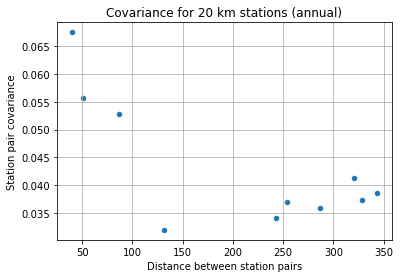

In [25]:
# basic plot
covariance_df.plot.scatter(x='separation_distance', y='covariance', c='tab:blue',
                               title="Covariance for 20 km stations (annual)")
plt.grid()
plt.xlabel("Distance between station pairs")
plt.ylabel("Station pair covariance")
# plt.xlim(0, 80000)
# plt.ylim(0.4, 1.0)
plt.show
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_20km_stns.png')

In [26]:
# reset df index to get access to station_pair column
covariance_df = covariance_df.reset_index()
# covariance_df

<function matplotlib.pyplot.show(close=None, block=None)>

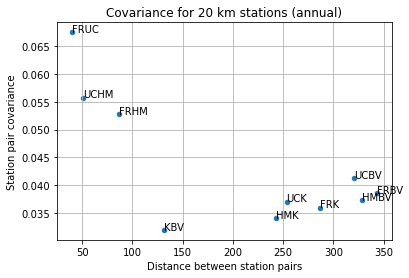

In [27]:
# basic plot
covariance_df.plot.scatter(x='separation_distance', y='covariance', c='tab:blue',
                               title="Covariance for 20 km stations (annual)")
plt.grid()
plt.xlabel("Distance between station pairs")
plt.ylabel("Station pair covariance")
# plt.xlim(0, 800)
# plt.ylim(0.02, 0.08)
# plot labels on points
for i, txt in enumerate(covariance_df.station_pair):
    plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
plt.show
# plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_20km_stns.png')

### Fit an exponential curve to the covariance data

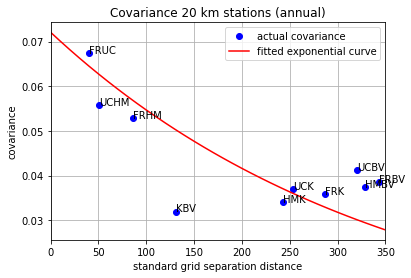

In [28]:
# use type_exp function from covariancefunction.py
# create a range of separation distances from 0 to 350
distarr = np.arange(0, 360, 10)
# set parameter values for exponential curve fitting
Range = 350
Sill = 0.07 # y-intercept estimated by eye from the plotted cov values - nugget
nugget = 0.03

# actual values from dataframe
x = covariance_df.separation_distance.values
y = covariance_df.covariance.values

# create a function that loops through sepdist values and calculates an estimated covariance for each
def type_exp(): 
    covlist = [] # empty list for estimated covariance values from exponential function
    for h in distarr:    
        expfit = Sill * (np.exp(-h/Range) + nugget) # fit exponential curve
        covlist.append(expfit) # append covariance values to the list
    return covlist

# create array of exponential curve estimated covariance values
yexp = np.array(type_exp())
    
# plot actual covariance values
plt.plot(x, y, 'bo', label="actual covariance")
# plot exponential curve values
plt.plot(distarr, yexp, 'r', label="fitted exponential curve")
# plotting
plt.title("Covariance 20 km stations (annual)")
plt.xlabel('standard grid separation distance')
plt.ylabel('covariance')
plt.legend()
plt.xlim(0, 350)
# plt.ylim(0, 0.15)
plt.grid()

# reset df index to get access to station_pair column
# covariance_df = covariance_df.reset_index()

# plot labels on points
for i, txt in enumerate(covariance_df.station_pair):
    plt.annotate(txt, (covariance_df.separation_distance.iat[i], covariance_df.covariance.iat[i]))
# plt.show()
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\covariance\covariance_tiedranks.png')

# print("sepdist = ", sepdist)
# print("h = ", h)
# print("yexp = ", yexp)